In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
rosette_df = pd.read_csv('../data/rosetteAreaWithAdditionalCategory.csv')

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


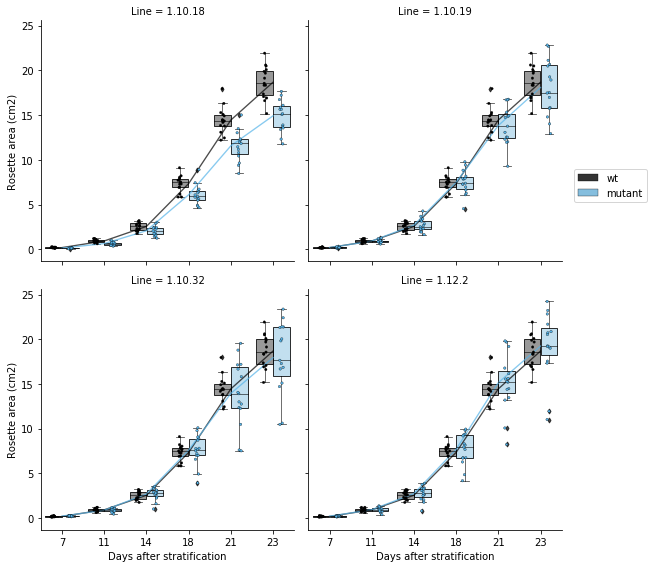

In [12]:
# Choose hue colour palette
colours = ['#000000', '#56B4E9']

# Set up FacetGrid for dataframe
grid = sns.FacetGrid(rosette_df, col="Line", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], col_wrap=2, 
                    size=4, aspect=1)

# Draw a box plot
boxplot = grid.map(sns.boxplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], palette=colours, fliersize=3.5, linewidth=0.8)

# Set boxplot transparency and draw a pointplot over each one
for i, ax in enumerate(grid.axes.flat):
    for patch in ax.artists:
        red, green, blue, alpha = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, .4))
    
    if i == 0:
        Line = '1.10.18'
    if i == 1:
        Line = '1.10.19'
    if i == 2: 
        Line = '1.10.32'
    if i == 3:
        Line = '1.12.2'
    sns.pointplot(x=rosette_df['Days after stratification']-7, y='Rosette area (cm2)', data=rosette_df[rosette_df['Line'] == Line],
                 hue='mutant_wt', hue_order = ['wt', 'mutant'], ax=ax, palette=colours, estimator=np.mean, 
                 markers="", dodge=False, join=True, scale=0.5, errwidth=0)
    plt.setp(ax.lines, alpha=.7)

# Draw a strip plot
stripplot = grid.map(sns.stripplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], size=2.5, alpha=1, jitter=True, linewidth=0.3, 
      dodge=True, palette=colours, edgecolor='gray')

# Adjust position and transparency of legend 
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
for lh in leg.legendHandles: 
    lh.set_alpha(.8)